## Overview

Read CDC case count and Census population data;  standardize column headings;  compute percent population for high risk age groups;  make a few charts.

In [35]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
#Local folder
os.chdir('/Users/tiggy/Documents/BML_Summer_22/Project')

## Cases - CDC data collected from state and local health departments

In [202]:
#Read file 
df=pd.read_csv("cases.txt",sep='\t')

In [203]:
df.head()

,Ctyname,Stname,STCODE,CTYCODE,Cases2000,Cases2001,Cases2002,Cases2003,Cases2004,Cases2005,...,Cases2010,Cases2011,Cases2012,Cases2013,Cases2014,Cases2015,Cases2016,Cases2017,Cases2018,Cases2019
0,Autauga County,Alabama,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,1
1,Baldwin County,Alabama,1,3,1,0,1,0,0,0,...,0,1,1,0,3,1,2,2,0,0
2,Barbour County,Alabama,1,5,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,Bibb County,Alabama,1,7,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,Blount County,Alabama,1,9,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,2,0


In [204]:
#Standardize col headings
years = list(range(2000, 2020))
years = [str(years[i]) for i in range(len(years))]
cols=['state','county','statecode','countycode']+years
df.columns=cols
df.head()

,state,county,statecode,countycode,2000,2001,2002,2003,2004,2005,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Autauga County,Alabama,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,1
1,Baldwin County,Alabama,1,3,1,0,1,0,0,0,...,0,1,1,0,3,1,2,2,0,0
2,Barbour County,Alabama,1,5,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,Bibb County,Alabama,1,7,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,Blount County,Alabama,1,9,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,2,0


In [205]:
#Make a plot
timeseries=df.mean().tolist()[2:]

/var/folders/r6/c3b9x06n2wgb9hj6h8xwhfww0000gn/T/ipykernel_24442/978228844.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  timeseries=df.mean().tolist()[2:]


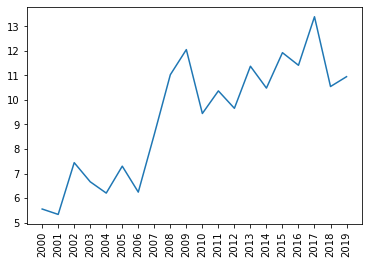

In [206]:
plt.plot(years,timeseries)
plt.xticks(rotation = 90) 
plt.show()

## Population data

In [207]:
#Function that standardizes column headings to match case data.  
#See cc-est2019-alldata_codebook.pdf (on Github) for column descriptions in original Census files.

def clean_pop_data(file):
    file=file.rename(columns = {'STNAME':'state','CTYNAME':'county',1: '2010_a', 2: '2010_j', 3: '2010', 4:'2011',5:'2012',6:'2013',7:'2014', 8: '2015', 
                         9: '2016', 10: '2017', 11:'2018', 12:'2019'})
    del file['2010_a']
    del file['2010_j']
    
    return file

In [208]:
#total population (all age groups)
totalpop=clean_pop_data(pd.read_excel("totalpop.xlsx"))

In [209]:
totalpop.head(1)

,state,county,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Alabama,Autauga County,109546,110454,109908,109454,109786,109728,110486,110780,111066,111738


In [198]:
#population age 5 to 9 
kids=clean_pop_data(pd.read_excel("pop5to9.xlsx"))

In [199]:
kids.head(1)

,state,county,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Alabama,Autauga County,3964,3902,3794,3756,3718,3688,3601,3551,3421,3465


In [191]:
pop5569=clean_pop_data(pd.read_excel("pop5569.xlsx"))

In [192]:
pop5569.head(1)

,state,county,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Alabama,Autauga County,8198,8427,8511,8694,8856,9168,9526,9620,9763,9949


## Compute age group percentages

In [193]:
#check division by zero
totalpop.isin([0]).sum()

state     0
county    0
2010      0
2011      0
2012      0
2013      0
2014      0
2015      0
2016      0
2017      0
2018      0
2019      0
dtype: int64

In [195]:
def percent_pop(f,tot):
    f['2010']=f['2010']/tot['2010']
    f['2011']=f['2011']/tot['2011']
    f['2012']=f['2012']/tot['2012']
    f['2013']=f['2013']/tot['2013']
    f['2014']=f['2014']/tot['2014']
    f['2015']=f['2015']/tot['2015']
    f['2016']=f['2016']/tot['2016']
    f['2017']=f['2017']/tot['2017']
    f['2018']=f['2018']/tot['2018']
    f['2019']=f['2019']/tot['2019']
    return f

In [200]:
#Percent pop aged 5 to 9
p59=totalpop #seed
p59=percent_pop(kids,totalpop)

In [212]:
p59.describe()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000
mean,0.031855,0.031724,0.031782,0.031826,0.031589,0.031359,0.031052,0.030665,0.030300,0.030158
std,0.005200,0.005234,0.005301,0.005357,0.005369,0.005336,0.005353,0.005319,0.005322,0.005337
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.028738,0.028588,0.028645,0.028611,0.028357,0.028181,0.027886,0.027460,0.027191,0.027031
50%,0.031637,0.031508,0.031549,0.031547,0.031350,0.031113,0.030797,0.030476,0.030159,0.030068
75%,0.034501,0.034432,0.034534,0.034588,0.034475,0.034158,0.033810,0.033420,0.032982,0.032915
max,0.061013,0.062690,0.061012,0.058135,0.057934,0.057564,0.072650,0.061134,0.062297,0.062665


In [213]:
#Percent pop aged 55 to 69
p5569=totalpop #seed
p5569=percent_pop(pop5569,totalpop)
p5569.describe()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000
mean,0.090857,0.092910,0.094945,0.096384,0.097892,0.099578,0.101323,0.101397,0.101848,0.102249
std,0.016061,0.016198,0.016362,0.016412,0.016503,0.016577,0.016751,0.016515,0.016434,0.016324
min,0.025398,0.023719,0.020913,0.020661,0.021546,0.022777,0.026376,0.027144,0.027500,0.027964
25%,0.081386,0.083437,0.085336,0.086757,0.088223,0.090040,0.091406,0.091496,0.091967,0.092409
50%,0.089775,0.091812,0.094001,0.095644,0.097242,0.098993,0.100902,0.100924,0.101414,0.101915
75%,0.098689,0.100936,0.103118,0.104729,0.106239,0.108135,0.110016,0.110245,0.110701,0.111196
max,0.177682,0.175800,0.179071,0.178472,0.178802,0.182228,0.185266,0.185505,0.186047,0.203488


# US wide cases correlation with age distr

In [225]:
boomers=list(p5569.mean())

/var/folders/r6/c3b9x06n2wgb9hj6h8xwhfww0000gn/T/ipykernel_24442/2449667562.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  boomers=list(p5569.mean())


In [226]:
boomers

[0.09085696369931756,
 0.09291021400880557,
 0.09494506863744166,
 0.09638415625985278,
 0.09789188578057541,
 0.09957848213516625,
 0.10132262640732423,
 0.10139682571727922,
 0.10184761583891672,
 0.10224941950604594]

In [227]:
len(boomers)
#plt.scatter(timeseries[10:18],boomers)

10

In [228]:
len(timeseries[10:20])

10

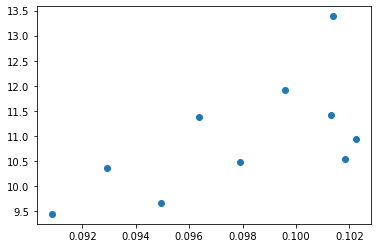

In [229]:
plt.scatter(boomers,timeseries[10:20])

In [230]:
kidperc=list(p59.mean())

/var/folders/r6/c3b9x06n2wgb9hj6h8xwhfww0000gn/T/ipykernel_24442/373011381.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  kidperc=list(p59.mean())


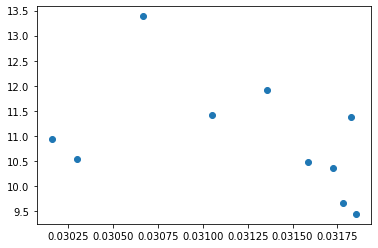

In [231]:
plt.scatter(kidperc,timeseries[10:20])